## Pie chart

### Axes.pie(self, x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)

Make a pie chart of array x. The fractional area of each wedge is given by x/sum(x). If sum(x) < 1, then the values of x give the fractional area directly and the array will not be normalized. The resulting pie will have an empty wedge of size 1 - sum(x).

The wedges are plotted counterclockwise, by default starting from the x-axis.

#### Parameters:
x : array-like
The wedge sizes.

explode : array-like, optional, default: None
If not None, is a len(x) array which specifies the fraction of the radius with which to offset each wedge.

labels : list, optional, default: None
A sequence of strings providing the labels for each wedge

colors : array-like, optional, default: None
A sequence of matplotlib color args through which the pie chart will cycle. If None, will use the colors in the currently active cycle.

autopct : None (default), string, or function, optional
If not None, is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct. If it is a function, it will be called.

pctdistance : float, optional, default: 0.6
The ratio between the center of each pie slice and the start of the text generated by autopct. Ignored if autopct is None.

shadow : bool, optional, default: False
Draw a shadow beneath the pie.

labeldistance : float or None, optional, default: 1.1
The radial distance at which the pie labels are drawn. If set to None, label are not drawn, but are stored for use in legend()

startangle : float, optional, default: None
If not None, rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.

radius : float, optional, default: None
The radius of the pie, if radius is None it will be set to 1.

counterclock : bool, optional, default: True
Specify fractions direction, clockwise or counterclockwise.

wedgeprops : dict, optional, default: None
Dict of arguments passed to the wedge objects making the pie. For example, you can pass in wedgeprops = {'linewidth': 3} to set the width of the wedge border lines equal to 3. For more details, look at the doc/arguments of the wedge object. By default clip_on=False.

textprops : dict, optional, default: None
Dict of arguments to pass to the text objects.

center : list of float, optional, default: (0, 0)
Center position of the chart. Takes value (0, 0) or is a sequence of 2 scalars.

frame : bool, optional, default: False
Plot axes frame with the chart if true.

rotatelabels : bool, optional, default: False
Rotate each label to the angle of the corresponding slice if true.


#### Returns:	
patches : list
A sequence of matplotlib.patches.Wedge instances

texts : list
A list of the label matplotlib.text.Text instances.

autotexts : list
A list of Text instances for the numeric labels. This will only be returned if the parameter autopct is not None.

#### Notes: The pie chart will probably look best if the figure and axes are square, or the Axes aspect is equal. This method sets the aspect ratio of the axis to "equal". The axes aspect ratio can be controlled with Axes.set_aspect.

### Basic pie chart

This example shows a few optional features:

1. slice labels
2. auto-labeling the percentage
3. offsetting a slice with "explode"
4. drop-shadow
5. custom start angle
Note about the custom start angle:

The default startangle is 0, which would start the "Frogs" slice on the positive x-axis. This example sets startangle = 90 such that everything is rotated counter-clockwise by 90 degrees, and the frog slice starts on the positive y-axis.

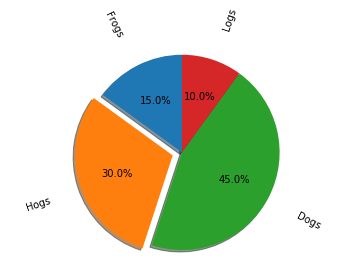

In [16]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%.1f%%', shadow=True, labels=labels, startangle=90, labeldistance=1.3, 
        rotatelabels=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

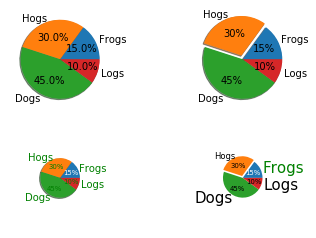

In [36]:
import matplotlib.pyplot as plt

# Some data
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

# Shift the second slice using explode
axs[0, 1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.1, 0, 0))

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops=dict(color='g'),
                                          shadow=True, radius=0.5)
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 15},
                                          shadow=False, radius=0.5,
                                          explode=(0, 0.05, 0, 0))
plt.setp(autotexts, size='x-small')
plt.setp(texts[1], size='small')
autotexts[0].set_color('white')
texts[0].set_color('g')

plt.show()

#### Bar of pie

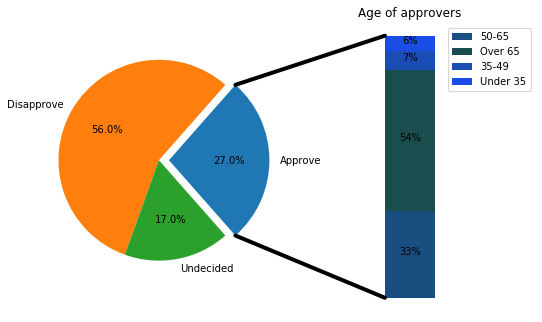

In [37]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [.33, .54, .07, .06]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Age of approvers')
ax2.legend(('50-65', 'Over 65', '35-49', 'Under 35'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

#### Nested pie charts

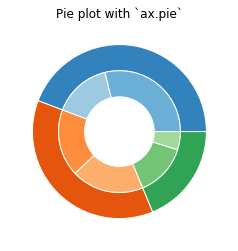

In [38]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

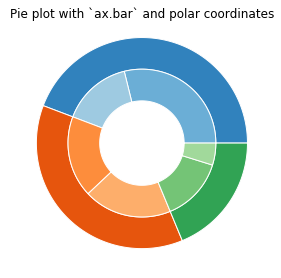

In [40]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True))

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
#normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
#obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, align="edge")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge")

ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
plt.show()